## Global Forest Cover


## Part 1: Tree Loss per Year per country

In [2]:
#!pip install openpyxl

In [3]:
# import packages

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

import tensorflow as tf
from tensorflow import keras
from keras import metrics
tf.get_logger().setLevel('INFO')

import os


2024-07-15 00:30:28.081973: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Set seeds for reproducibility

In [4]:
import random as python_random

# Sets seeds for reproducibility 
def reset_seeds(seed_val = 0):
   np.random.seed(seed_val) 
   python_random.seed(seed_val)
   tf.random.set_seed(seed_val)

reset_seeds()

In [5]:
# LOAD Cleaned SHEET 2

gfc_tc_loss = pd.read_csv('../data/GlobalForestWatch/cleaned/gfc_tc_yearly.csv')

gfc_tc_loss


,Unnamed: 0,country,threshold,area_ha,extent_2000_ha,extent_2010_ha,gain_2000-2020_ha,year,tc_loss_ha
0,0,Afghanistan,30,64385715,205791,71797,10741,2001,88
1,1,Akrotiri and Dhekelia,30,23448,456,383,42,2001,2
2,2,Albania,30,2873537,648680,589017,16472,2001,3729
3,3,Algeria,30,230804377,1223621,821606,89152,2001,3469
4,4,Andorra,30,45196,19004,18962,120,2001,2
...,...,...,...,...,...,...,...,...,...
5423,5423,Western Sahara,30,26732060,0,0,1,2023,0
5424,5424,Yemen,30,45220898,126,147,7047,2023,0
5425,5425,Zambia,30,75049202,24050819,22436285,768157,2023,190417
5426,5426,Zimbabwe,30,39068111,1414326,1061510,151989,2023,5690


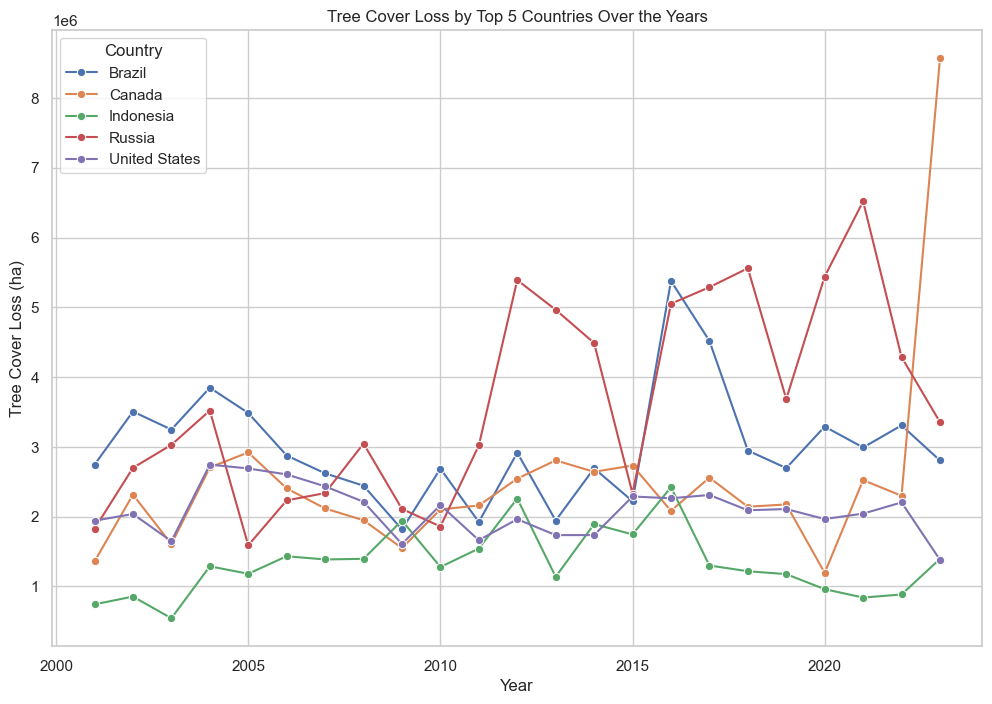

In [6]:
country_agg_df = gfc_tc_loss.groupby('country')['tc_loss_ha'].sum().reset_index()

# top 5 countries of tree cover loss
top_countries = country_agg_df.sort_values('tc_loss_ha', ascending=False).head(5)['country']

filtered_df = gfc_tc_loss[gfc_tc_loss['country'].isin(top_countries)]

aggregated_df = filtered_df.groupby(['year', 'country'])['tc_loss_ha'].sum().reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.lineplot(data=aggregated_df, x='year', y='tc_loss_ha', hue='country', marker='o')

plt.title('Tree Cover Loss by Top 5 Countries Over the Years')
plt.xlabel('Year')
plt.ylabel('Tree Cover Loss (ha)')
plt.legend(title='Country')
plt.show()

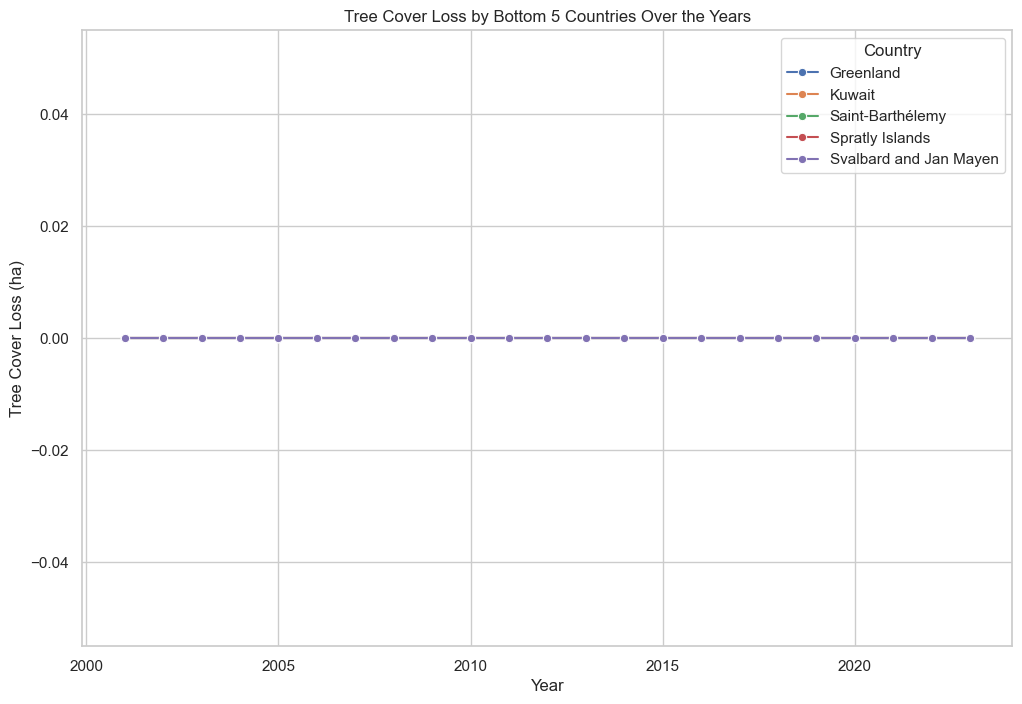

In [7]:

# bottom 5 countries of tree cover loss
bottom_countries = country_agg_df.sort_values('tc_loss_ha', ascending=True).head(5)['country']

filtered_df = gfc_tc_loss[gfc_tc_loss['country'].isin(bottom_countries)]

aggregated_df = filtered_df.groupby(['year', 'country'])['tc_loss_ha'].sum().reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.lineplot(data=aggregated_df, x='year', y='tc_loss_ha', hue='country', marker='o')

plt.title('Tree Cover Loss by Bottom 5 Countries Over the Years')
plt.xlabel('Year')
plt.ylabel('Tree Cover Loss (ha)')
plt.legend(title='Country')
plt.show()

<Axes: xlabel='tc_loss_ha', ylabel='country'>

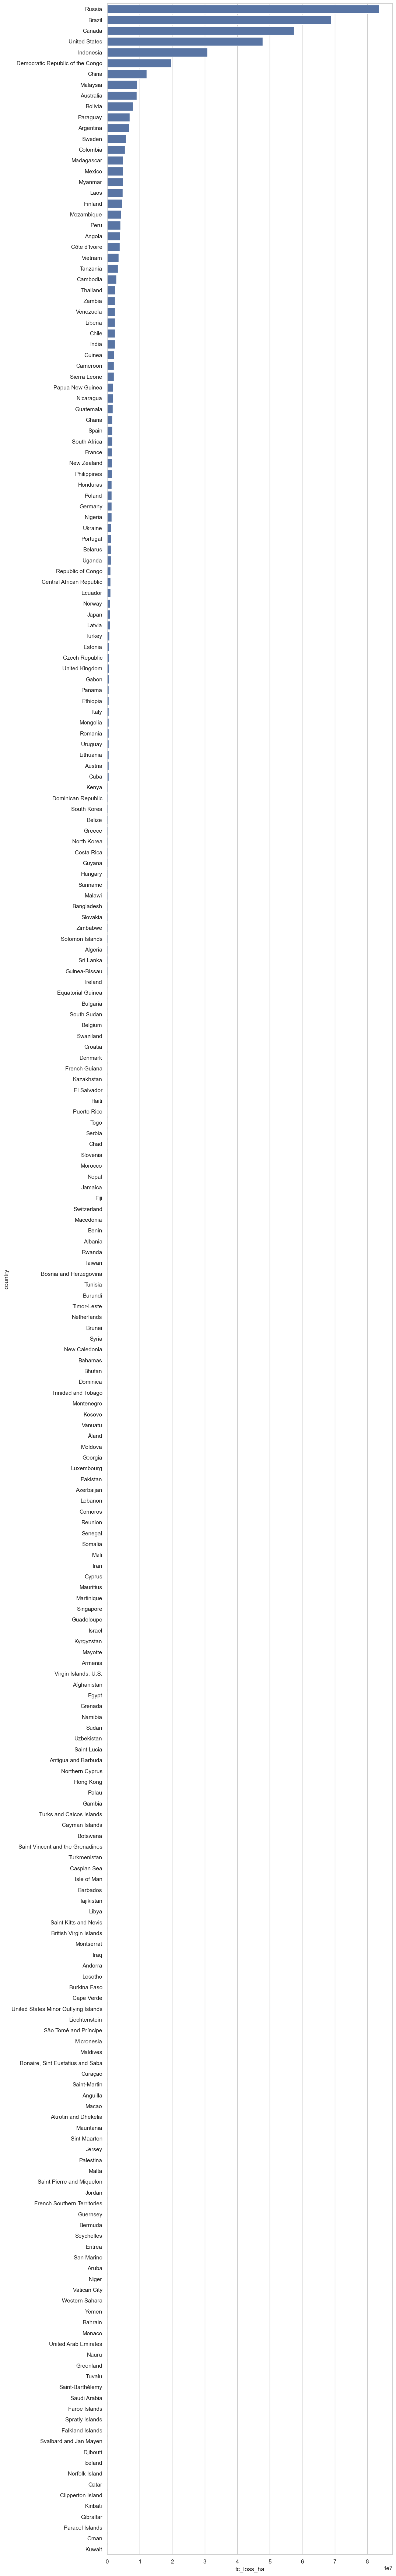

In [8]:
plt.figure(figsize=(10, 90))
descending_total_countries_df = country_agg_df.sort_values('tc_loss_ha', ascending=False)
sns.barplot(data=descending_total_countries_df, x='tc_loss_ha', y='country')


In [9]:
# LOAD Cleaned SHEET 2

gfc_carbon = pd.read_csv('../data/GlobalForestWatch/cleaned/gfc_carbon_yearly.csv')

gfc_carbon

,Unnamed: 0,country,year,gfw_forest_carbon_gross_emissions__Mg_CO2e
0,0,Afghanistan,2001,23243.0
1,1,Afghanistan,2002,38860.0
2,2,Afghanistan,2003,45741.0
3,3,Afghanistan,2004,33108.0
4,4,Afghanistan,2005,38775.0
...,...,...,...,...
5423,5423,Åland,2019,720130.0
5424,5424,Åland,2020,206110.0
5425,5425,Åland,2021,421934.0
5426,5426,Åland,2022,365348.0


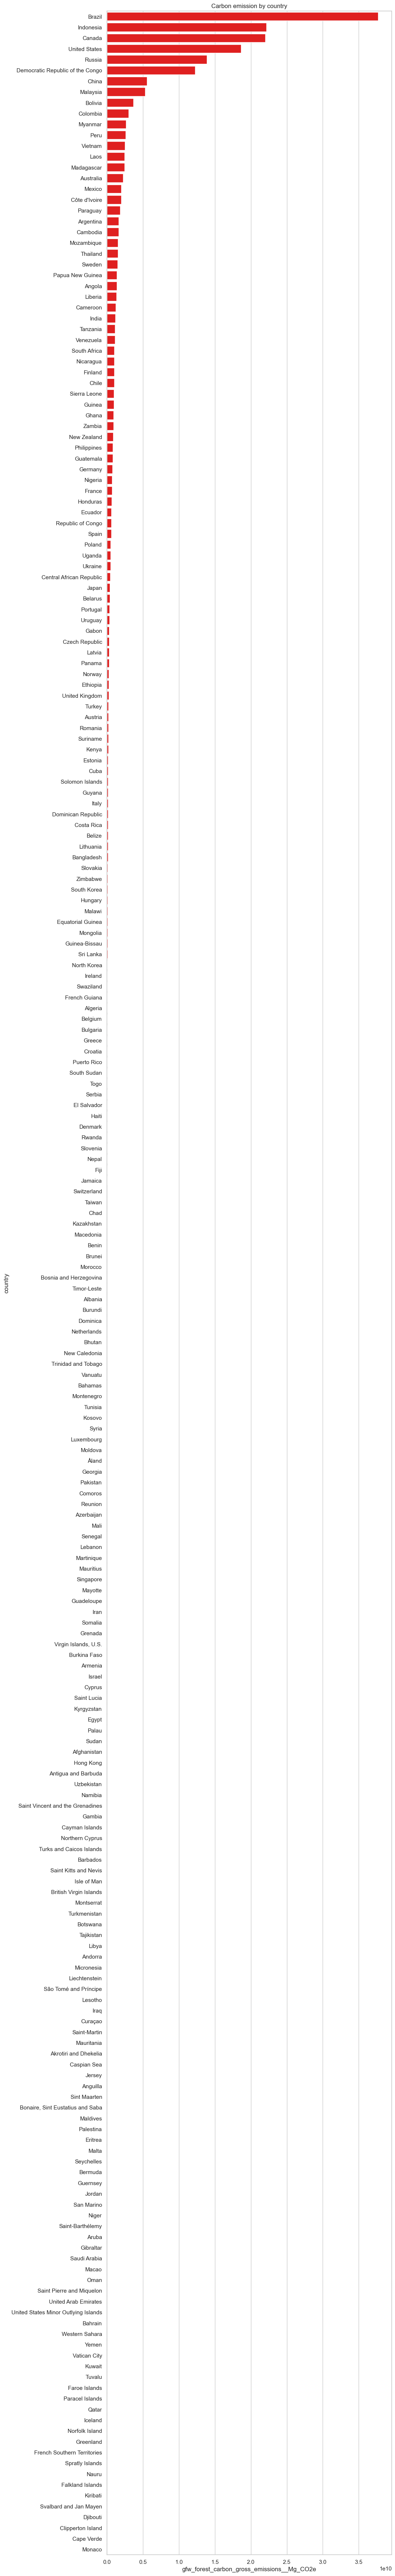

In [11]:

# The emissions data quantifies the amount of carbon dioxide emissions to the atmosphere where forest disturbances have occurred, and includes CO2, CH4, and N2O and multiple carbon pools. Removals includes the average annual carbon captured by aboveground and belowground woody biomass in forests. Net flux is the difference between average annual emissions and average annual removals; negative values are net sinks and positive values are net sources. 
 

country_agg_df = gfc_carbon.groupby('country')['gfw_forest_carbon_gross_emissions__Mg_CO2e'].sum().reset_index()
descending_total_countries_df = country_agg_df.sort_values('gfw_forest_carbon_gross_emissions__Mg_CO2e', ascending=False)
plt.figure(figsize=(10, 90))
sns.barplot(data=descending_total_countries_df, x='gfw_forest_carbon_gross_emissions__Mg_CO2e', y='country', color='red')
plt.title("Carbon emission by country")
plt.show()